In [21]:

import cv2
import json
from src.lib.utils.pnp.cuboid_pnp_shell import pnp_shell
import matplotlib.pyplot as plt
import numpy as np
from src.lib.opts import opts

import copy
import math

In [22]:
opt = opts()
opt.nms = True
opt.obj_scale = True
opt.c="cereal_box"
print(opt.nms, opt.obj_scale)

True True


In [23]:
# GT: 
# gt={"image_name": "IMG_0594.JPG", "points": [[2810, 1365], [2522, 945], [1992, 814], [2519, 2040], [1980, 2043], [3806, 551], [3272, 295], [3827, 2049], [3284, 2056]], "size": [305, 230, 130]}
# detection_good={"camera_data": [[3648.0, 0.0, 2736.0], [0.0, 3648.0, 1824.0], [0.0, 0.0, 1.0]], "objects": [{"class": "chair", "ct": [2929.3299865722656, 2485.1241087913513], "bbox": [1989.4806690216064, 1591.8797178268433, 3869.179304122925, 3378.3684997558594], "confidence": 0.8282926082611084, "kps_displacement_mean": [2720.097255706787, 2691.236743927002, 2004.6089544296265, 2855.2162227630615, 2700.6444597244263, 1713.7226972579956, 2000.622179031372, 1590.0445976257324, 3829.530075073242, 2993.795928955078, 3323.6559448242188, 3351.2521648406982, 3837.2926025390625, 1686.6544704437256, 3304.8967208862305, 1608.515172958374], "kps_heatmap_mean": [-10000.0, -10000.0, -10000.0, -10000.0, -10000.0, -10000.0, -10000.0, -10000.0, -10000.0, -10000.0, -10000.0, -10000.0, -10000.0, -10000.0, -10000.0, -10000.0], "kps_heatmap_std": [-136800.0, -136800.0, -136800.0, -136800.0, -136800.0, -136800.0, -136800.0, -136800.0, -136800.0, -136800.0, -136800.0, -136800.0, -136800.0, -136800.0, -136800.0, -136800.0], "kps_heatmap_height": [-10000.0, -10000.0, -10000.0, -10000.0, -10000.0, -10000.0, -10000.0, -10000.0], "obj_scale": [1.3523062467575073, 0.9976310729980469, 0.6064821481704712], "location": [0.3433396361578627, 0.056340555104357926, -2.7862794284941312], "quaternion_xyzw": [0.3048153176676774, -0.2577127921477818, 0.652038784477188, 0.644606207242886], "kps_pnp": [[0.5302856445647685, 0.6273761477707794], [0.46829303657925403, 0.7306153319382209], [0.36881478226131786, 0.7741946310537049], [0.4608084277531649, 0.44600848156400746], [0.35845366814732477, 0.4516917034179153], [0.700288192694801, 0.8299233619651942], [0.5997170065144917, 0.9133704627601872], [0.6951496164405954, 0.43363974769138186], [0.5907604261271974, 0.43956546177562383]], "kps_3d_cam": [[0.3433396361578627, 0.05634055510435787, -2.7862794284941312], [0.8109409274172042, -0.16724261634667315, -3.5164224364512107], [0.8506116768926584, -0.6104478283295021, -3.102218572347077], [-0.18678518146809947, -0.20337652504134485, -3.4595282162611407], [-0.14711443199264523, -0.6465817370241738, -3.0453243521570066], [0.8337937043083707, 0.7592628472328895, -2.527234504831256], [0.873464453783825, 0.3160576352500607, -2.1130306407271218], [-0.16393240457693298, 0.7231289385382178, -2.4703402846411855], [-0.1242616551014788, 0.279923726555389, -2.056136420537052]]}]}

In [24]:
img_id="IMG_0904"

In [28]:

detect_string="../demo/ford/"+img_id+".json"
gt_string="../data/outf_all/ford/order_train_size_correct.json"
with open(detect_string) as f:
    detection=json.load(f)
print(detection)


with open(gt_string) as f:
    data=json.load(f)
for dict in data:
    if img_id in dict["image_name"]:
        gt=dict
        break
    
print()
print(gt)

FileNotFoundError: [Errno 2] No such file or directory: '../demo/ford/IMG_0904.json'

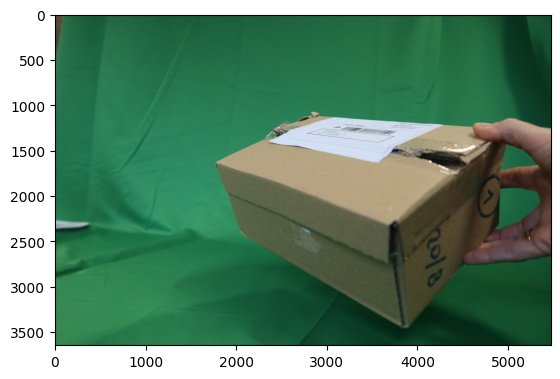

In [ ]:
img=plt.imread("/apollo/mle/Datasets/boxes/"+gt["image_name"])
plt.imshow(img)
for p in gt["points"]:
    plt.plot(p[0], img.shape[0]-p[1], "ro")
plt.show()

In [ ]:
camera_ford=np.array([[3648, 0, 2736], [0, 3648, 1824], [0, 0, 1]], dtype=np.float32)
meta={"width": img.shape[1],"height": img.shape[0], "camera_matrix":camera_ford }

In [ ]:
invert_points=[]
for i, p in enumerate(gt["points"]):
    invert_points.append([p[0], img.shape[0]-p[1]])

In [ ]:
bbox= {'kps': invert_points[1:], "obj_scale": gt["size"]}
print(bbox)
projected_points, point_3d_cam, scale, points_ori, bbox=pnp_shell(opt, meta, bbox,invert_points, gt["size"], OPENCV_RETURN=False)

{'kps': [], 'obj_scale': [240, 167, 100]}


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
print(bbox["kps_3d_cam"])
gt_p=bbox["kps_3d_cam"]


[[ 0.31368773  0.07140938 -2.714605  ]
 [ 0.72421003 -0.1324161  -3.46254948]
 [ 0.7908955  -0.55784769 -3.09644607]
 [-0.26580548 -0.17090783 -3.3269483 ]
 [-0.19912001 -0.59633943 -2.96084489]
 [ 0.82649546  0.73915819 -2.4683651 ]
 [ 0.89318094  0.31372659 -2.1022617 ]
 [-0.16352005  0.70066645 -2.33276393]
 [-0.09683457  0.27523486 -1.96666052]]


In [ ]:
detect_p=np.array(detection["objects"][0]["kps_3d_cam"])
print(detect_p)


[[ 0.33181947  0.09838311 -2.74015808]
 [ 0.77750478 -0.11617628 -3.45034345]
 [ 0.8266645  -0.61011488 -2.78699152]
 [-0.21951233 -0.11191104 -3.37328051]
 [-0.1703526  -0.60584964 -2.70992857]
 [ 0.83399154  0.80261587 -2.77038758]
 [ 0.88315127  0.30867726 -2.10703565]
 [-0.16302556  0.80688111 -2.69332464]
 [-0.11386584  0.31294251 -2.0299727 ]]


In [ ]:
for g_p, d_p in zip(gt_p, detect_p):
    print(math.dist(g_p, d_p))

0.04134370838671489
0.05703550690277368
0.31586927701199946
0.08814959394884406
0.25273900959827666
0.3087080275237812
0.012201663450564651
0.3758800664577453
0.07563308562104974


In [ ]:
# from src.tools.objectron_eval.objectron.dataset.box import Box
# from src.tools.objectron_eval.objectron.dataset.iou import IoU

In [ ]:
from src.tools.objectron_eval.objectron.dataset.box import Box as Boxcls
from src.tools.objectron_eval.objectron.dataset.iou import IoU

In [ ]:
gt_box=Boxcls(gt_p)
detect_box=Boxcls(detect_p)
gt_box.fit(gt_p)
detect_box.fit(detect_p)


(array([[ 0.04935818, -0.99701711,  0.05933514],
        [ 0.80284137,  0.00426524, -0.59617744],
        [ 0.59414603,  0.07706294,  0.80065711]]),
 array([ 0.33181947,  0.09838311, -2.74015808]),
 array([1.14442551, 1.        , 0.82850939]))

In [ ]:

iou=IoU(gt_box, detect_box)
print(iou.iou())

0.6134656871359838
